In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif')
rc('figure', facecolor='w')
from astropy.io import fits, ascii
from astropy.table import Table
import os
import math
import time
import corner
from isochrones import StarModel
from isochrones.mist import MISTModelGrid
from isochrones.mist import MIST_Isochrone
from isochrones.dartmouth import DartmouthModelGrid
from isochrones.dartmouth import Dartmouth_Isochrone
from isochrones.dartmouth import Dartmouth_FastIsochrone

In [25]:
data = ascii.read("wu_parameters.txt")  
name = np.array(['KIC' + str(k) for k in data['kic']])

teff = np.array(data['teff'])
logg = np.array(data['logg'])
fe_h = np.array(data['feh'])
mass = np.array(data['mass'])
ages = np.array(data['age'])
numax = np.array(data['numax'])
delnu = np.array(data['dnu'])

e_teff = np.array(data['err_teff'])
e_logg = np.array(data['err_logg'])
e_fe_h = np.array(data['err_feh'])
e_mass = np.array(data['err_mass'])
e_ages = np.array(data['err_age'])
e_numax = np.array(data['err_numax'])
e_delnu = np.array(data['err_dnu'])

params = {'teff':teff, 'logg':logg, 'fe_h':fe_h, 'mass':mass, 'ages':ages}

(array([ 483, 1678, 2454]),)

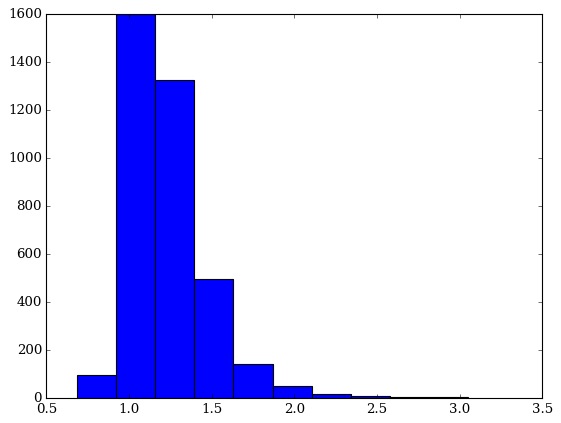

In [3]:
plt.hist(mass);
r = [.75,.02]
np.where((mass<r[0]+r[1]) & (mass>r[0]-r[1]))

In [26]:
# n = [3380, 339, 2203]
n = [500, 99, 734, 676]
NAME = [name[i] for i in n]
AGES = [(ages[i], e_ages[i]) for i in n]
MASS = [(mass[i], e_mass[i]) for i in n]
TEFF = [(teff[i], e_teff[i]) for i in n]
LOGG = [(logg[i], e_logg[i]) for i in n]
FE_H = [(fe_h[i], e_fe_h[i]) for i in n]
NUMAX = [(numax[i], e_numax[i]) for i in n]
DELNU = [(delnu[i], e_delnu[i]) for i in n]
print('mass', MASS)
print('ages', AGES)

mass [(1.0089296, 0.0850298), (1.2917167, 0.0618448), (1.6846391, 0.099289), (2.0143285, 0.1177541)]
ages [(11.0371, 3.10811), (4.1103, 0.64978), (2.13612, 0.445993), (1.399, 0.268419)]


In [118]:
dart = Dartmouth_FastIsochrone()
mist = MIST_Isochrone()

In [8]:
mist_mdl, dart_mdl = [], []
for i in range(len(n)):
    mist_mdl.append(StarModel(mist, Teff=TEFF[i], logg=LOGG[i], feh=FE_H[i], nu_max=NUMAX[i], delta_nu=DELNU[i]))
    dart_mdl.append(StarModel(dart, Teff=TEFF[i], logg=LOGG[i], feh=FE_H[i], nu_max=NUMAX[i], delta_nu=DELNU[i]))

### MultiNest:

In [15]:
start = time.time()
for i in range(len(n)): 
    mist_mdl[i].fit(basename='spec_fit_mist_'+str(i+1))
    mist_mdl[i].save_hdf('spec_fit_mist_'+str(i+1)+'.h5', overwrite=True)
    
    dart_mdl[i].fit(basename='spec_fit_dart_'+str(i+1))
    dart_mdl[i].save_hdf('spec_fit_dart_'+str(i+1)+'.h5', overwrite=True)
print(time.time() - start)

77.65390253067017


### emcee:

In [95]:
# ndim = 5
# mist_samples, dart_samples = [], []
# start = time.time()

# for i in range(len(n)):
#     mist_sampler = mist_mdl[i].fit_mcmc(nwalkers=300, nburn=100, niter=1000, p0=None, initial_burn=None, ninitial=50)
#     msample = mist_sampler.chain[:, 50:, :].reshape((-1, ndim))
#     mist_samples.append(msample)
#     mist_mdl[i].save_hdf('spec_fit_mist_'+str(i+1)+'.h5', overwrite=True)
    
#     dart_sampler = dart_mdl[i].fit_mcmc(nwalkers=300, nburn=100, niter=1000, p0=None, initial_burn=None, ninitial=50)
#     dsample = dart_sampler.chain[:, 50:, :].reshape((-1, ndim))
#     dart_samples.append(dsample)
# #     dart_mdl[i].save_hdf('spec_fit_dart_'+str(i+1)+'.h5', overwrite=True)
    
# print(time.time() - start)

/home/jess/anaconda3/lib/python3.6/site-packages/isochrones/starmodel.py:492: RuntimeWarning: divide by zero encountered in log
  lnp += np.log(self.prior('mass', masses[0]))


272.1247613430023


In [ ]:
# mist_mdl, dart_mdl = [], []
# for i in range(len(n)):
#     mist_mdl.append(StarModel.load_hdf('spec_fit_mist_'+str(i+1)+'.h5'))
#     dart_mdl.append(StarModel.load_hdf('spec_fit_dart_'+str(i+1)+'.h5'))

In [13]:
# mist_samples = np.array(mist_samples)
# dart_samples = np.array(dart_samples)
# for i in range(len(n)):
#     print('MASS', MASS[i])
#     print('MIST', np.mean(mist_samples[i].T[0]), np.std(mist_samples[i].T[0]))
#     print('DART', np.mean(dart_samples[i].T[0]), np.std(dart_samples[i].T[0]))
#     print('AGE ', AGES[i])
#     print('MIST', np.mean(mist_samples[i].T[1]), np.std(mist_samples[i].T[1]))
#     print('DART', np.mean(dart_samples[i].T[1]), np.std(dart_samples[i].T[1]), '\n')

In [121]:
alpha = .3
lo = .1
hi = 1
C = (1 + alpha)/(hi**(1 + alpha) - lo**(1 + alpha))
print(C)

1.368592088268338


[2.2884689308255193, 9.096188398653664]


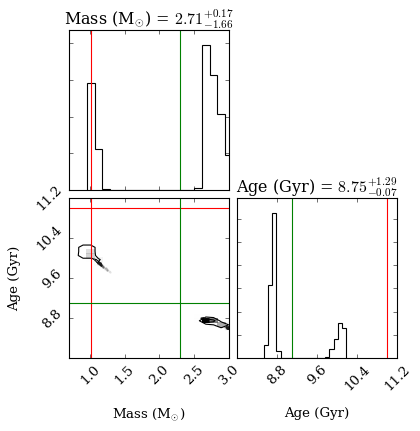

In [130]:
i = 0
mdist = dart_mdl[i].samples.mass_0_0
adist = dart_mdl[i].samples.age_0_0
dist = np.array([mdist, adist]).T

wu_fit = [[1.01, 11.0], [1.29, 4.1], [1.68,2.1], [2.01,1.4]]
my_fit = [np.mean(mdist), np.mean(adist)]
print(my_fit)
# plt.hist2d(mdist, adist, bins=100, cmap='Greys');
fig = corner.corner(dist, labels=("Mass (M$_{\odot}$)", "Age (Gyr)"), show_titles=True)
fig.axes[0].set_xlim(.7,3)
fig.axes[2].set_xlim(.7,3)
fig.axes[2].set_ylim(8,11.2)
fig.axes[3].set_xlim(8,11.2)

fig.axes[0].axvline(wu_fit[i][0], color="r", linewidth=1)
fig.axes[2].axvline(wu_fit[i][0], color="r", linewidth=1)
fig.axes[2].axhline(wu_fit[i][1], color="r", linewidth=1)
fig.axes[3].axvline(wu_fit[i][1], color="r", linewidth=1)

fig.axes[0].axvline(my_fit[0], color="g", linewidth=1)
fig.axes[2].axvline(my_fit[0], color="g", linewidth=1)
fig.axes[2].axhline(my_fit[1], color="g", linewidth=1)
fig.axes[3].axvline(my_fit[1], color="g", linewidth=1)

KIC10972858
MASS (1.0089296, 0.0850298)
2.2884689308255193 0.7914980898261875
2.6079029872747244 0.2005521793215255
AGE (11.0371, 3.10811)
9.096188398653664 0.6010690935499468
8.697888482427931 0.4512819473887891


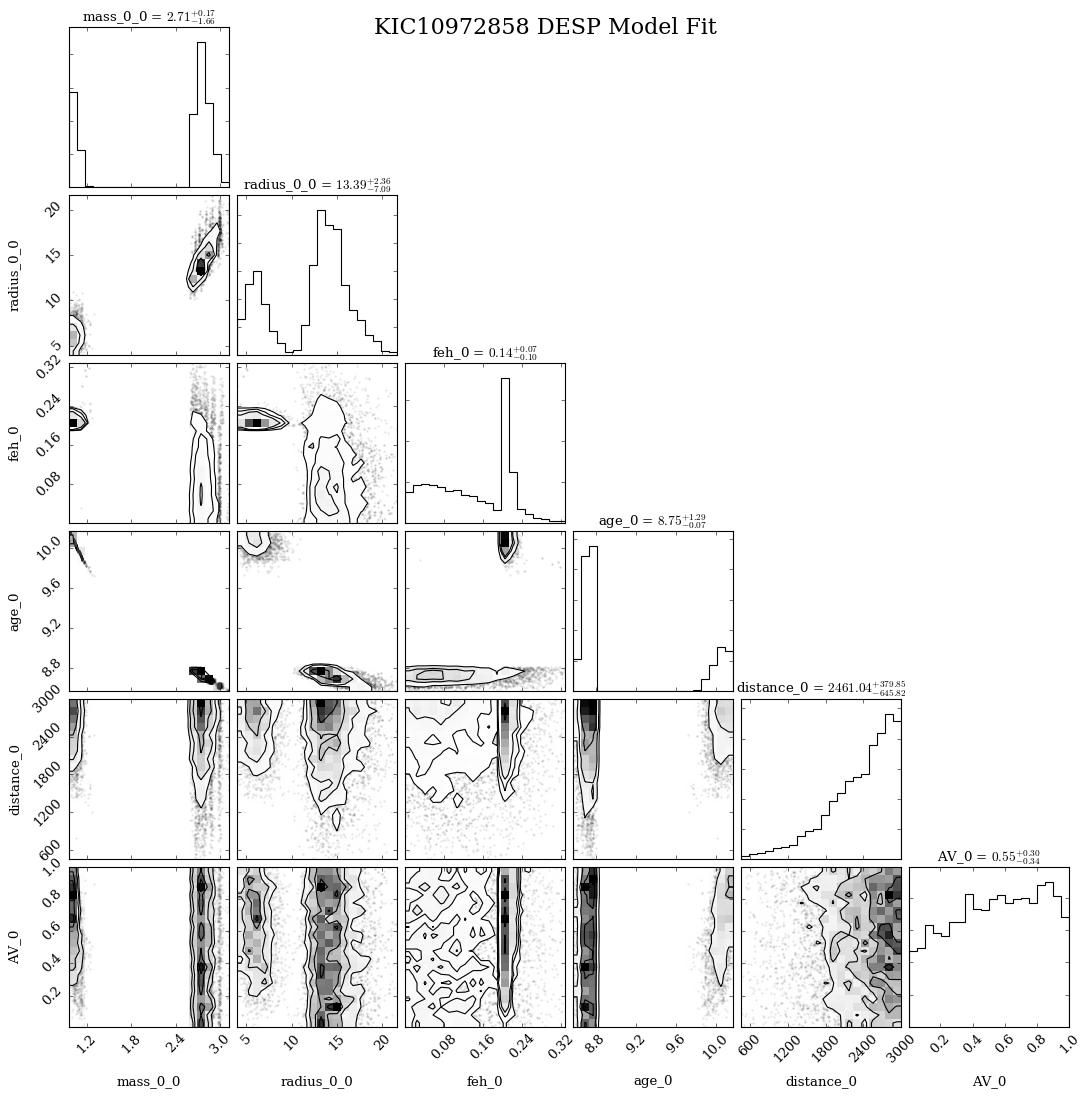

In [131]:
i = 0
print(NAME[i])
print('MASS', MASS[i])
print(np.mean(dart_mdl[i].samples.mass_0_0), np.std(dart_mdl[i].samples.mass_0_0))
print(np.mean(mist_mdl[i].samples.mass_0_0), np.std(mist_mdl[i].samples.mass_0_0))
print('AGE', AGES[i])
print(np.mean(dart_mdl[i].samples.age_0_0), np.std(dart_mdl[i].samples.age_0_0))
print(np.mean(mist_mdl[i].samples.age_0_0), np.std(mist_mdl[i].samples.age_0_0))

# fig = mist_mdl[i].corner_physical(show_titles=True, title_kwargs={"fontsize": 12}) #, labels=['R_{\odot}', 'Fe/H', 'Age', 'dist', 'AV']
# fig.suptitle("%s MIST Model Fit"%(NAME[i]), fontsize=20);

fig = dart_mdl[i].corner_physical(show_titles=True, title_kwargs={"fontsize": 12}) #, labels=['R_{\odot}', 'Fe/H', 'Age', 'dist', 'AV']
fig.suptitle("%s DESP Model Fit"%(NAME[i]), fontsize=20);

In [ ]:
i = 1
print(AGES[i])
print(np.mean(dart_mdl[i].samples.age_0_0), np.std(dart_mdl[i].samples.age_0_0))
print(np.mean(mist_mdl[i].samples.age_0_0), np.std(mist_mdl[i].samples.age_0_0))
fig = mist_mdl[i].corner_physical(show_titles=True, title_kwargs={"fontsize": 12})
fig.suptitle("Source %s MIST Model Fit"%(str(i+1)), fontsize=20);

In [3]:
print(len(data))
for k in params.keys():
    print(k, min(params[k]), max(params[k]))

3720
teff 3867.5197754 5395.2036133
logg 1.60944 3.61552
fe_h -1.7806816 0.6201028
mass 0.6850581 3.0507591
ages 0.47522 18.3755


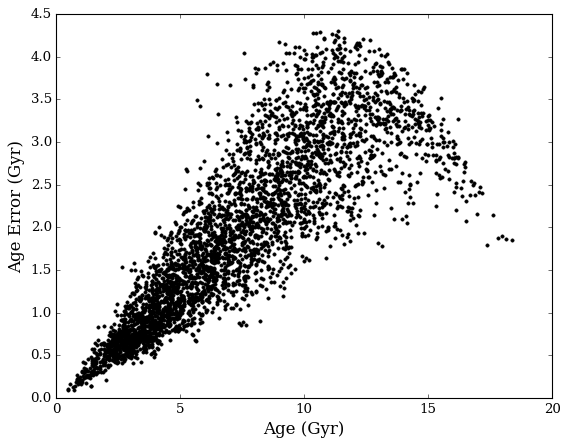

In [11]:
old = np.where(ages > 13.8)[0]
plt.plot(ages, e_ages, "k.")
plt.xlabel('Age (Gyr)', fontsize=15)
plt.ylabel('Age Error (Gyr)', fontsize=15)
plt.show()

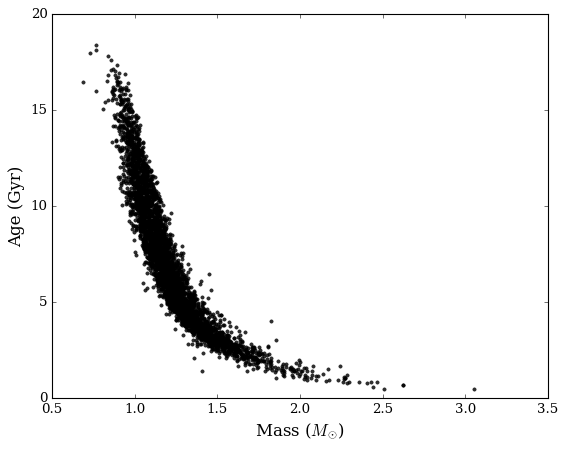

In [15]:
plt.plot(mass, ages, ".k", alpha=.8)
plt.ylabel('Age (Gyr)', fontsize=15)
plt.xlabel('Mass ($M_{\odot}$)', fontsize=15)
plt.show()

(3.7, 1.5)

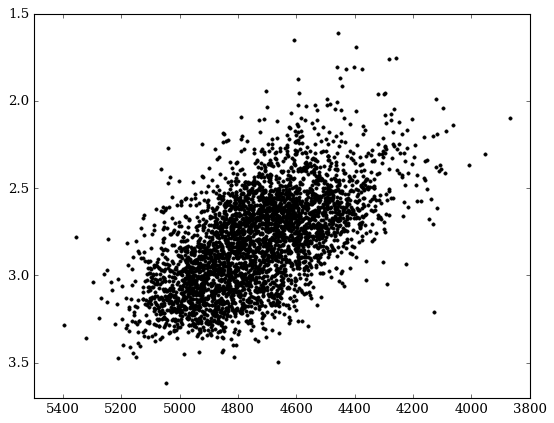

In [21]:
plt.plot(teff, logg, "k.")
plt.xlim(5500,3800)
plt.ylim(3.7,1.5)

Text(0.5,0,'Mass ($M_{\\odot}$)')

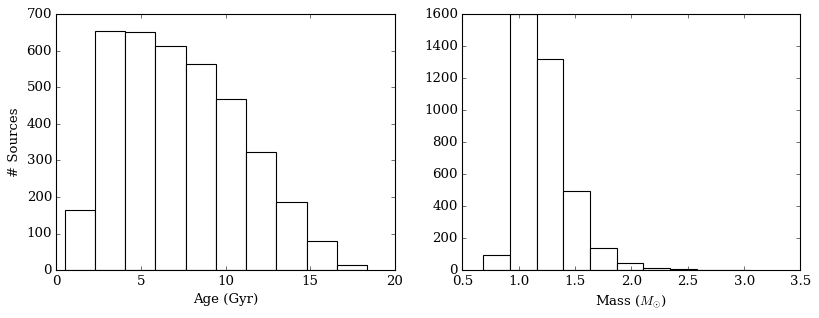

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,4])
ax1.hist(ages, facecolor='w')
ax1.set_xlabel('Age (Gyr)')
ax1.set_ylabel('# Sources')
ax2.hist(mass, facecolor='w')
ax2.set_xlabel('Mass ($M_{\odot}$)')

Text(0.5,0,'[Fe/H]')

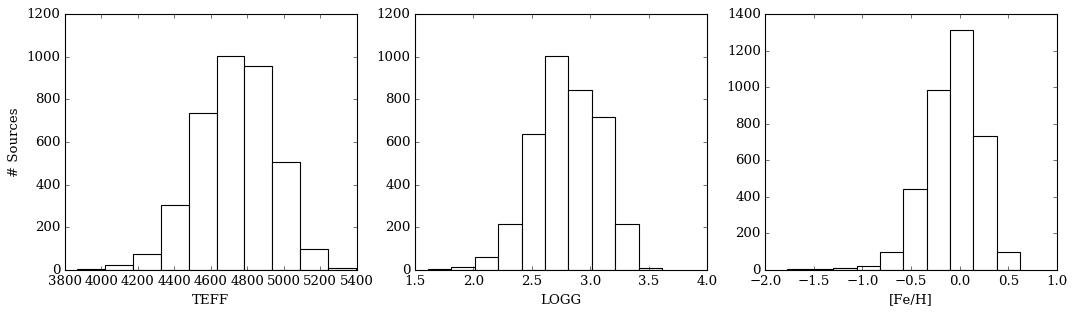

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[16,4])
ax1.hist(teff, facecolor='w')
ax1.set_xlabel('TEFF')
ax1.set_ylabel('# Sources')
ax2.hist(logg, facecolor='w')
ax2.set_xlabel('LOGG')
ax3.hist(fe_h, facecolor='w')
ax3.set_xlabel('[Fe/H]')